# Выбор локации для скважины

**Дано:**  для «ГлавРосГосНефть» нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 

**Задача:** построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.


**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


**План исследования:**
1. Загрузка, обзор, подготовка данных
2. Обучение и проверка модели для каждого региона
3. Подготовка к расчёту прибыли
4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели
5. Расчёт прибыли и рисков для каждого региона
6. Вывод

## 1. Загрузка, обзор, подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    geo_data_0 = pd.read_csv('/Users/galina//Desktop/учёба/спринт 8/geo_data_0.csv') 
    geo_data_1 = pd.read_csv('/Users/galina//Desktop/учёба/спринт 8/geo_data_1.csv') 
    geo_data_2 = pd.read_csv('/Users/galina//Desktop/учёба/спринт 8/geo_data_2.csv') 
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv') 
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv') 
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#смотрю описание таблиц:
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    display(dataset.head(5))
    print()
    print(dataset.info())
    print('Кол-во дубликатов =', dataset.duplicated().sum())
    print()
    display(dataset.describe())  #чтобы посмотреть, есть ли отрицательные запасы в product
    print('---------------------------------------------------')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Кол-во дубликатов = 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


---------------------------------------------------


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Кол-во дубликатов = 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


---------------------------------------------------


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Кол-во дубликатов = 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


---------------------------------------------------


In [4]:
#посмотрю, есть ли дубликаты по id и какие:
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    print('Кол-во дубликатов по id =', dataset.id.duplicated().sum())
    display(dataset[dataset.id.duplicated(keep=False)].sort_values(by='id'))
    print()

Кол-во дубликатов по id = 10


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502



Кол-во дубликатов по id = 4


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305



Кол-во дубликатов по id = 4


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [5]:
#поскольку дубликатов 10, 4, 4, можно их удалить, оставив скважины с наибольшим из дубликатов значением product:
geo_data_0.drop(labels=[66136, 51970, 69163, 931, 63593, 75715, 60140, 97785, 1364, 16633],
                axis=0,
                inplace=True)

geo_data_1.drop(labels=[5849, 41906, 82178, 47591],
                axis=0,
                inplace=True)

geo_data_2.drop(labels=[45404, 49564, 95090, 28039],
                axis=0,
                inplace=True)

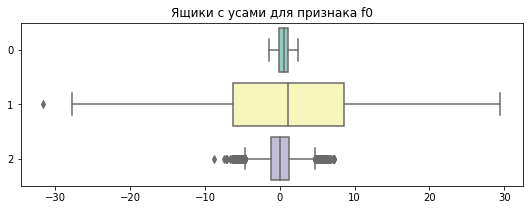

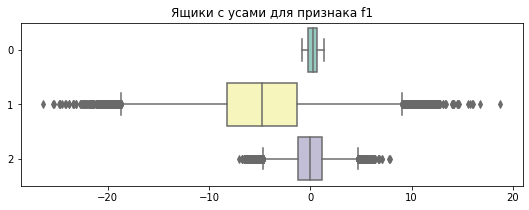

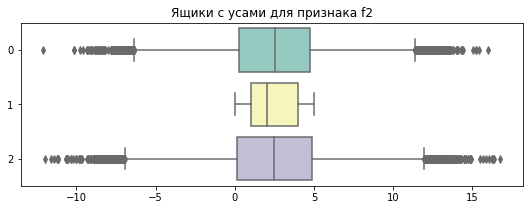

In [6]:
#посмотрю на выбросы в признаках:
plt.figure(figsize=(9,3))
sns.boxplot(data=[geo_data_0.f0, geo_data_1.f0, geo_data_2.f0], palette='Set3', orient='h')
plt.title('Ящики с усами для признака f0')
plt.show()

plt.figure(figsize=(9,3))
sns.boxplot(data=[geo_data_0.f1, geo_data_1.f1, geo_data_2.f1], palette='Set3', orient='h')
plt.title('Ящики с усами для признака f1')
plt.show()

plt.figure(figsize=(9,3))
sns.boxplot(data=[geo_data_0.f2, geo_data_1.f2, geo_data_2.f2], palette='Set3', orient='h')
plt.title('Ящики с усами для признака f2')
plt.show()

Есть выбросы:
- в столбце f0 датафрейма geo_data_2 
- в столбце f1 датафреймов geo_data_1 и geo_data_2
- в столбце f2 датафреймов geo_data_0 и geo_data_2 

In [7]:
#столбец id в дальнейшем анализе не участвует, поэтому удалю его, предварительно сделав словарем:
dict_0 = geo_data_0[['id']].to_dict('index')
dict_1 = geo_data_1[['id']].to_dict('index')
dict_2 = geo_data_2[['id']].to_dict('index')

In [8]:
#удаляю столбец id:
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    dataset.drop(columns=['id'],axis=1, inplace=True)
    display(dataset)

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [9]:
#смотрю, как коррелируют между собой признаки и целевой признак:
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    display(dataset.corr())

,f0,f1,f2,product
f0,1.000000,-0.440730,-0.003203,0.143508
f1,-0.440730,1.000000,0.001760,-0.192346
f2,-0.003203,0.001760,1.000000,0.483662
product,0.143508,-0.192346,0.483662,1.000000


,f0,f1,f2,product
f0,1.000000,0.182278,-0.001796,-0.030509
f1,0.182278,1.000000,-0.002609,-0.010168
f2,-0.001796,-0.002609,1.000000,0.999397
product,-0.030509,-0.010168,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000512,-0.000438,-0.001960
f1,0.000512,1.000000,0.000790,-0.001029
f2,-0.000438,0.000790,1.000000,0.445886
product,-0.001960,-0.001029,0.445886,1.000000


### Выводы по п.1. Загрузка, обзор, подготовка данных:

1. В таблицах пропусков нет. Явных дубликатов нет. От неявных избавилась, за счет чего датасеты незначительно сократились. Типы данных преобразовывать не надо. Артефактов в product нет. Столбец id сделала словарем, чтобы сохранить обозначение скважины (вдруг понадобится) и чтобы убрать данные типа object из дальнейшего анализа.
2. От выбросов избавляться не вижу смысла, так как непонятно, что такое f0, f1, f2. Но с другой стороны выбросов очень много, и это могут быть человеческие ошибки при заполнении данных. Поэтому тут сомневаюсь в выводе - возможно, стоит убрать выбросы, чтобы столбец f2 в geo_data_1 не оказывал почти 100%-ного влияния на product. 
3. Наибольшее влияние на целевой признак оказывает признак f2. Остальные признаки влияют менее значимо или обратно пропорционально.
4. Данных достаточно для дальнейшего анализа.

## 2. Обучение и проверка модели для каждого региона

In [10]:
reg = 0
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    features = dataset.drop(['product'], axis=1) #извлекаю признаки 
    target = dataset['product']  # извлекаю целевой признак

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) #разбиваю данные на обучающую и валидационную выборки в соотношении 75:25

    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid)

    rmse = mean_squared_error(target_valid, predictions_valid)**0.5

    print('Для региона', reg, ':')
    print('RMSE на валидационной выборке =', round(rmse, 3))
    print('Средний предсказанный запас сырья =', round(target_valid.mean(), 3), 'тыс.бар.')
    print('Средний реальный запас сырья = ', round(target.mean(),3), 'тыс.бар.')
    print('Разница между реальным и предсказанным запасами сырья =', round(target.mean() - target_valid.mean(), 3), 'тыс.бар.')
    print('----------------------------------------------------------------------')
    reg += 1

Для региона 0 :
RMSE на валидационной выборке = 37.667
Средний предсказанный запас сырья = 92.468 тыс.бар.
Средний реальный запас сырья =  92.502 тыс.бар.
Разница между реальным и предсказанным запасами сырья = 0.034 тыс.бар.
----------------------------------------------------------------------
Для региона 1 :
RMSE на валидационной выборке = 0.891
Средний предсказанный запас сырья = 68.442 тыс.бар.
Средний реальный запас сырья =  68.826 тыс.бар.
Разница между реальным и предсказанным запасами сырья = 0.384 тыс.бар.
----------------------------------------------------------------------
Для региона 2 :
RMSE на валидационной выборке = 40.172
Средний предсказанный запас сырья = 94.759 тыс.бар.
Средний реальный запас сырья =  95.001 тыс.бар.
Разница между реальным и предсказанным запасами сырья = 0.242 тыс.бар.
----------------------------------------------------------------------


### Вывод по п.2. Обучение и проверка модели для каждого региона:

Самая маленькая RMSE - на регионе 1. Это значит, что лучше всего модель работает в этом регионе. Это произошло за счет почти прямой корреляции признака f2 с целевым.
В остальных регионах RMSE гораздо выше - видимо, есть шумы, и модель не может учесть какие-то важные параметры, лежащие в основе данных.

## 3. Подготовка к расчёту прибыли

In [11]:
#ключевые значения для расчётов сохраняю в отдельных переменных:
WELLS = 200                 #200 лучших точек для разработки
BUDGET = 10000000000        #бюджет на разработку скважин в регионе — 10 млрд рублей
REVENUE = 450000            #тысяча баррелей сырья приносит 450 тыс рублей дохода

In [12]:
oil_volume_for_well = BUDGET / REVENUE / WELLS 
print('Достаточный объём сырья для безубыточной разработки новой скважины =', round(oil_volume_for_well, 3), 'тыс.бар.')

Достаточный объём сырья для безубыточной разработки новой скважины = 111.111 тыс.бар.


### Вывод по п.3. Подготовка к расчёту прибыли:

Средний реальный запас сырья:
- для региона 0 = 92.502
- для региона 1 = 68.826
- для региона 2 = 95.001

Во всех трех регионах cредний реальный сырья меньше, чем надо для безубыточной разработки новой скважины. 
При этом в регионе 1, где модель лучше всего предсказывает объемы, сырья меньше необходимого в 1,6 раза.

## 4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [13]:
#функция, которая на основе предсказаний (target, probabilities), доходов (revenue) и кол-ва скважин (count) считает прибыль:
def profit_calc(target, probabilities, revenue, count): 
    probs_sorted = probabilities.sort_values(ascending=False) #сортирую предсказания по скважинам по убыванию
    selected = target[probs_sorted.index][:count]             #отбираю срезом до count индексы скважин с максимальными значениями предсказаний 
    return revenue * selected.sum() - BUDGET                  #возвращаю прибыль = доход * скважины с максимальными значениями предсказаний - бюджет на разработку скважин в регионе

## 5. Расчёт прибыли и рисков для каждого региона

In [14]:
reg = 0
for dataset in [geo_data_0, geo_data_1, geo_data_2]:
    features = dataset.drop(['product'], axis=1)  
    target = dataset['product']  

    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345)

    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    
    predictions_valid_ = pd.Series(predictions_valid) #перевожу массив предсказаний в pd.Series                                                
    target_valid_ = pd.Series(target_valid).reset_index(drop=True)  #перевожу целевой признак в pd.Series

    state = np.random.RandomState(12345)
    
    values = []
    
    for i in range(1000):
        target_subsample = target_valid_.sample(n=500, replace=True, random_state=state) 
        probs_subsample = predictions_valid_[target_subsample.index]
        values.append(profit_calc(target_subsample, probs_subsample, REVENUE, WELLS))

    values = pd.Series(values)

    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    risk = st.percentileofscore(values, 0)
    
    print('Для региона', reg, ':')
    print('Средняя выручка =', round(mean, 3))
    print('Доверительный интервал: [', round(lower,3), ':', round(upper,3), ']')
    print('Риск -', risk, '%')
    print('------------------------------------------------------------')
    
    reg += 1

Для региона 0 :
Средняя выручка = 461697805.147
Доверительный интервал: [ -90992266.113 : 984182738.88 ]
Риск - 4.5 %
------------------------------------------------------------
Для региона 1 :
Средняя выручка = 466843805.419
Доверительный интервал: [ 63931448.627 : 908046939.297 ]
Риск - 1.2 %
------------------------------------------------------------
Для региона 2 :
Средняя выручка = 373863189.636
Доверительный интервал: [ -176955328.902 : 923645992.04 ]
Риск - 8.1 %
------------------------------------------------------------


## 6. Вывод 

Предпочтительный регион для разработки скважин - регион 1, так как:
- вероятность убытков в нем 1.2%, то есть меньше 2.5%
- средняя выручка наибольшая

У регионов 0 и 2 вероятность убытков больше 2.5%